In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas_datareader.data as web
import datetime

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [0]:
start=datetime.datetime(2014,3,1)
end=datetime.datetime(2020,5,5)

In [0]:
hul=web.DataReader('HINDUNILVR.NS','yahoo',start,end)
jws=web.DataReader('JSWSTEEL.NS','yahoo',start,end)
jindal=web.DataReader('JINDALSTEL.NS','yahoo',start,end)
hcl=web.DataReader('HCLTECH.NS','yahoo',start,end)
alkem=web.DataReader('ALKEM.NS','yahoo',start,end)
lupin=web.DataReader('LUPIN.NS','yahoo',start,end)
cipla=web.DataReader('CIPLA.NS','yahoo',start,end)
bajajF=web.DataReader('BAJFINANCE.NS','yahoo',start,end)
hdfc=web.DataReader('HDFCBANK.NS','yahoo',start,end)
info=web.DataReader('INFY.NS','yahoo',start,end)
kotak=web.DataReader('KOTAKBANK.NS','yahoo',start,end)

In [8]:
hul.tail()

,High,Low,Open,Close,Volume,Adj Close,Returns
Date,,,,,,,
2020-04-29,2291.699951,2221.000000,2290.000000,2231.750000,3642151.0,2231.750000,-0.025415
2020-04-30,2272.000000,2160.000000,2272.000000,2195.000000,8448047.0,2195.000000,-0.016467
2020-05-04,2160.000000,2066.000000,2130.000000,2082.649902,8474573.0,2082.649902,-0.051185
2020-05-05,2121.000000,2033.099976,2101.199951,2041.500000,4304136.0,2041.500000,-0.019758
2020-05-06,2073.000000,2000.000000,2049.949951,2010.199951,5127656.0,2010.199951,-0.015332


In [0]:
#adding returns column in each dataframe
stocks=(hul,jws,jindal,hcl,alkem,lupin,cipla,bajajF,hdfc,info,kotak)
for stock in stocks:
  stock['Returns']=stock['Close'].pct_change(periods=1)
### can also take logarithmic return #np.log(stock/stock.shift(1))

In [0]:
returns_df=pd.concat([hul['Returns'],jws['Returns'],jindal['Returns'],hcl['Returns'],alkem['Returns'],lupin['Returns'],cipla['Returns'],bajajF['Returns'],hdfc['Returns'],info['Returns'],kotak['Returns']],axis=1)

In [0]:
returns_df.columns=['hul','jws','jindal','hcl','alkem','lupin','cipla','bajajF','hdfc','infosys','kotak']

In [12]:
returns_df.head()

,hul,jws,jindal,hcl,alkem,lupin,cipla,bajajF,hdfc,infosys,kotak
Date,,,,,,,,,,,
2014-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-04,0.021539,0.025322,0.022071,-0.015453,NaN,0.006309,0.005443,-0.002423,0.008256,0.000343,0.010075
2014-03-05,-0.006668,0.006623,-0.004036,-0.012793,NaN,-0.000101,0.018091,-0.017349,-0.002903,0.005828,0.006059
2014-03-06,-0.003901,0.012936,0.023911,0.020103,NaN,-0.006118,-0.014916,0.037750,0.008735,0.002669,0.009621
2014-03-07,0.002459,0.035836,0.018603,-0.002646,NaN,-0.016789,0.003818,0.012559,0.053064,-0.023903,0.035208


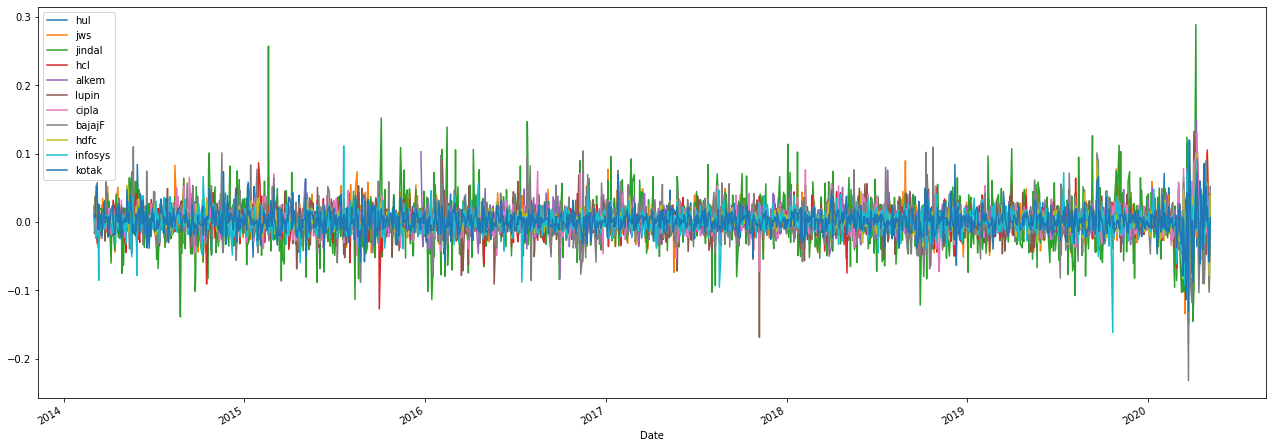

In [28]:
returns_df.plot(figsize=(22,8))

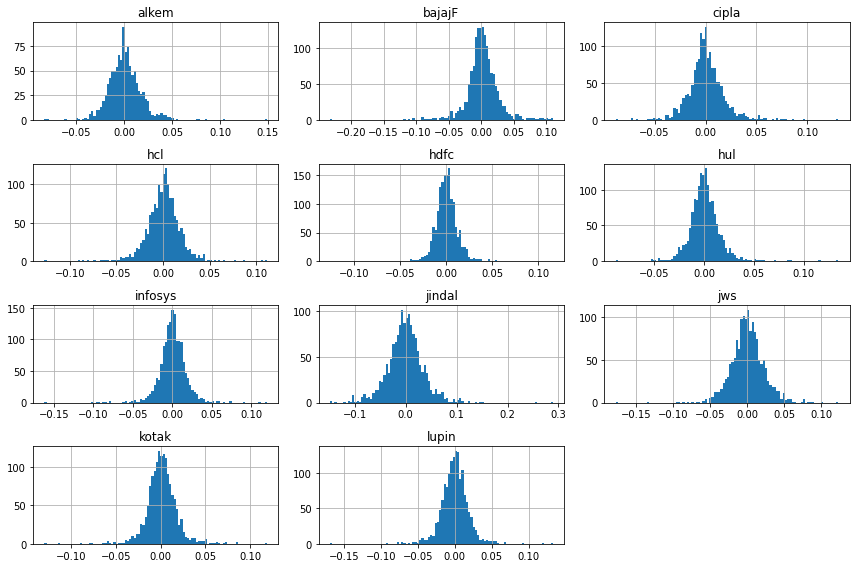

In [39]:
returns_df.hist(bins=100,figsize=(12,8))
plt.tight_layout()

In [46]:
## annual return... 
import math
returns_df.mean()*math.sqrt(252)

hul        0.015547
jws        0.010854
jindal    -0.000184
hcl        0.005892
alkem      0.011868
lupin      0.000997
cipla      0.007089
bajajF     0.031897
hdfc       0.012410
infosys    0.006019
kotak      0.016108
dtype: float64

In [27]:
returns_df.std()

hul        0.015198
jws        0.022601
jindal     0.036142
hcl        0.017765
alkem      0.017529
lupin      0.018764
cipla      0.017264
bajajF     0.024367
hdfc       0.013504
infosys    0.017568
kotak      0.017083
dtype: float64

In [0]:
##Correlation coefficients
corr=returns_df.corr()
cov=returns_df.cov()

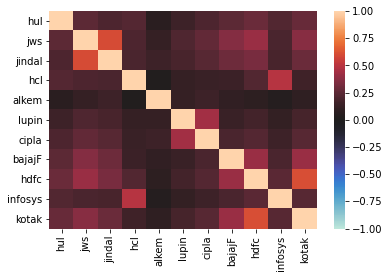

In [48]:
ax=sns.heatmap(corr,vmax=1,vmin=-1,center=0)


In [0]:
######### =--- Making Efficient frontier and calculating Sharpe Ratio---######
### this type of simulation is possiblr for less no. of stocks... for more no. of stocks use scipy method below
rf=.06
num_portF=100000
all_weights=np.zeros((num_portF,len(returns_df.columns)))
ret_arr=np.zeros(num_portF)
vol_arr=np.zeros(num_portF)
sharpe_arr=np.zeros(num_portF)

for i in range(num_portF):

  #weights
  weights=np.array(np.random.random(len(returns_df.columns)))
  weights=weights/np.sum(weights)  #to make sum=1
  all_weights[i,:]=weights
  #expected Return
  ret_arr[i]=np.sum(returns_df.mean()*252*weights)
  
  #expected volatility
  vol_arr[i]=np.sqrt(np.dot(weights.T,np.dot(cov*252,weights)))

  #sharpe Ratio
  sharpe_arr[i]=(ret_arr[i]-rf)/vol_arr[i]


In [118]:
sharpe_arr.argmax()

24067

In [119]:
## Optimum Portfolio
print('Portfolio Weights-',all_weights[24067,:])
print('Portfolio Return-',ret_arr[24067])
print('Portfolio Volatility-',vol_arr[24067])
print('Sharpe Ratio-',sharpe_arr[24067])

Portfolio Weights- [0.14631357 0.01525137 0.0059536  0.00158248 0.23211593 0.02199402
 0.02178589 0.24994467 0.1548534  0.09692713 0.05327792]
Portfolio Return- 0.265349494641446
Portfolio Volatility- 0.17644256989797483
Sharpe Ratio- 1.1638319185680994


In [120]:
vol_arr.argmin()

70705

In [121]:
## Minimum varience Portfolio
print('Portfolio Weights-',all_weights[70705,:])
print('Portfolio Return-',ret_arr[70705])
print('Portfolio Volatility-',vol_arr[70705])
print('Sharpe Ratio-',sharpe_arr[70705])

Portfolio Weights- [0.18963583 0.02804341 0.00687528 0.05868943 0.15328364 0.05100368
 0.1328428  0.00916279 0.17371701 0.1614199  0.03532623]
Portfolio Return- 0.1650569486837916
Portfolio Volatility- 0.1462625074007504
Sharpe Ratio- 0.718276683141647


In [0]:
max_sr_ret=ret_arr[24067]
max_sr_vol=vol_arr[24067]
max_minvar_ret=ret_arr[70705]
max_minvar_vol=vol_arr[70705]

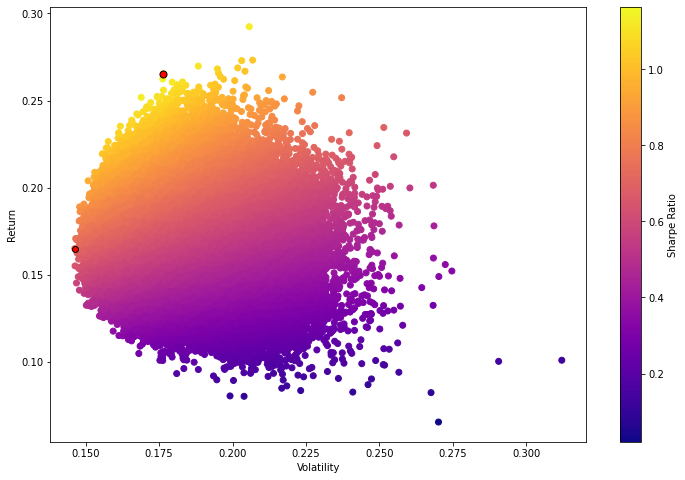

In [123]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma',)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')
plt.scatter(max_minvar_vol,max_minvar_ret,c='red',edgecolors='black')

In [0]:
####------ Portfolio Optimization -----#####

def get_ret_vol_sr(weights):
  rf=0.06
  weights=np.array(weights)
  ret=np.sum(returns_df.mean()*weights)*252
  vol=np.sqrt(np.dot(weights.T,np.dot(returns_df.cov(),weights*252)))
  sr=(ret-rf)/vol
  return np.array([ret,vol,sr])

In [0]:
from scipy.optimize import minimize

In [0]:
def neg_sharpe(weights):
  return get_ret_vol_sr(weights)[2]*-1

In [0]:
def check_sum(weights):
  #returns 0 if the sum of weights is 1
  return np.sum(weights)-1  

In [0]:
constraints=({'type':'eq','fun':check_sum})

In [0]:
bounds=((0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1))

In [0]:
init_guess=[0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09]

In [0]:
opt_result=minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=constraints)

In [148]:
opt_result

     fun: -1.3038948713998706
     jac: array([-0.28046806,  0.1282493 ,  1.28943533, -0.07148467, -0.27851516,
        0.30157644, -0.04762617, -0.27968684, -0.26322657, -0.00271124,
       -0.28096125])
 message: 'Optimization terminated successfully.'
    nfev: 121
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([3.16413246e-01, 2.98535068e-16, 0.00000000e+00, 3.48991127e-16,
       1.83328236e-01, 4.86413752e-16, 6.43609515e-17, 3.94698190e-01,
       7.62871754e-17, 1.67549893e-16, 1.05560329e-01])

In [149]:
opt_result.x

array([3.16413246e-01, 2.98535068e-16, 0.00000000e+00, 3.48991127e-16,
       1.83328236e-01, 4.86413752e-16, 6.43609515e-17, 3.94698190e-01,
       7.62871754e-17, 1.67549893e-16, 1.05560329e-01])

In [150]:
get_ret_vol_sr(opt_result.x)

array([0.33947961, 0.21434213, 1.30389487])

In [0]:
#### Plotting Efficient Frontier
frontier_y=np.linspace(0,0.5,100)

In [0]:
def minimize_volatility(weights):
  return get_ret_vol_sr(weights)[1]

In [0]:
frontier_volatility=[]
for possible_return in frontier_y:
  cons=({'type':'eq','fun':check_sum},
        {'type':'eq','fun':lambda w:get_ret_vol_sr(w)[0]-possible_return})
  result=minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

  frontier_volatility.append(result['fun'])


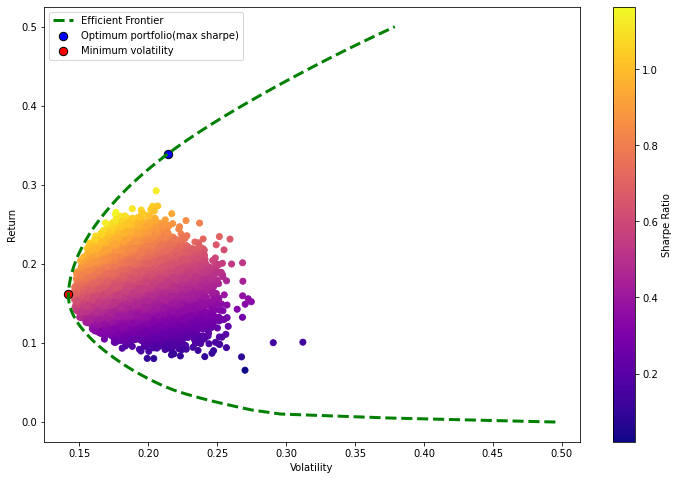

In [172]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma',)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3,label='Efficient Frontier')
plt.scatter(0.21434213,0.33947961,c='blue',edgecolors='black',s=70,label='Optimum portfolio(max sharpe)')
plt.scatter(0.14197073816870695,0.16161616161616163,c='red',edgecolors='black',s=70,label='Minimum volatility')
plt.legend();

In [167]:
## Optimum Portfolio
print('Portfolio Weights-',opt_result.x)
print('Portfolio Return-',get_ret_vol_sr(opt_result.x)[0])
print('Portfolio Volatility-',get_ret_vol_sr(opt_result.x)[1])
print('Sharpe Ratio-',(get_ret_vol_sr(opt_result.x)[0]-rf)/get_ret_vol_sr(opt_result.x)[1])

Portfolio Weights- [3.16413246e-01 2.98535068e-16 0.00000000e+00 3.48991127e-16
 1.83328236e-01 4.86413752e-16 6.43609515e-17 3.94698190e-01
 7.62871754e-17 1.67549893e-16 1.05560329e-01]
Portfolio Return- 0.33947960805771493
Portfolio Volatility- 0.21434213308751163
Sharpe Ratio- 1.3038948713998706


In [168]:
## Optimum Portfolio
print('Portfolio Weights-',opt_result.x)
print('Portfolio Return-',frontier_y[np.argmin(frontier_volatility)])
print('Portfolio Volatility-',np.min(frontier_volatility))
print('Sharpe Ratio-',(frontier_y[np.argmin(frontier_volatility)]-rf)/np.min(frontier_volatility))

Portfolio Weights- [3.16413246e-01 2.98535068e-16 0.00000000e+00 3.48991127e-16
 1.83328236e-01 4.86413752e-16 6.43609515e-17 3.94698190e-01
 7.62871754e-17 1.67549893e-16 1.05560329e-01]
Portfolio Return- 0.16161616161616163
Portfolio Volatility- 0.14197073816870695
Sharpe Ratio- 0.715754266878636
